In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')


In [85]:
feat_df = pd.read_csv('exp\gen_data\Feature__Maxerror.csv')
conclusion_df = pd.read_csv('exp\gen_data\Conclusion.csv')

feat_df_swat = pd.read_csv('exp\SWaT_2019\Feature__Maxerror.csv')
conclusion_df_swat = pd.read_csv('exp\SWaT_2019\Conclusion.csv')

# Preprocess

## Conclusion

### Swat

In [62]:
Id_SWaT = ['LIT 301','MV 501','MV201','P101 Status','P301 Status','P601 Status']
cyclic_SWaT = ['Y','N','Y','Y','N','Y']

In [64]:
cyclic_SWaT_df = pd.DataFrame({'Id': Id_SWaT, 'cyclic': cyclic_SWaT}).set_index('Id')

In [29]:
conclusion_df_swat['min(max_error)'] = conclusion_df_swat['min(max_error)'].fillna(conclusion_df_swat['min'])
conclusion_df_swat['max(max_error)'] = conclusion_df_swat['max(max_error)'].fillna(conclusion_df_swat['max'])
conclusion_df_swat['Time Average(in range)'] = conclusion_df_swat['Time Average(in range)'].fillna(conclusion_df_swat['Time Average(s)'])

In [30]:
conclusion_df_swat = conclusion_df_swat.drop(columns=['min','max','Time Average(s)'],axis=1)

 ### 10 data gen,concat

In [65]:
cyclic = ['N','N','N','N','N','Y','Y','Y','Y','Y']
cyclic_df = pd.DataFrame({'Id': range(1,11), 'cyclic': cyclic}).set_index('Id')

In [34]:
summary = pd.concat([conclusion_df,conclusion_df_swat])
summary = summary.set_index('Id')

In [66]:
summary_cyclic = pd.concat([cyclic_df,cyclic_SWaT_df])

In [46]:
Topdown_df = summary.loc[summary['Algorithm']=='Top-down']
Bottomup_df = summary.loc[summary['Algorithm']=='Bottom-up']
Sldw_df = summary.loc[summary['Algorithm']=='Sliding-window']
Swab_df = summary.loc[summary['Algorithm']=='SWAB']

## Feat

In [88]:
summary_feat_df = pd.concat([feat_df,feat_df_swat],ignore_index=True)
summary_feat_df

,id,Num_points,mean,median,variance,standard_deviation,absolute_sum_of_changes,mean_abs_change,kurtosis,minimum,maximum,Min(max_error)_Top_down,Max(max_error)_Top_down,Min(max_error)_Bottom_up,Max(max_error)_Bottom_up,Min(max_error)_SLDW,Max(max_error)_SLDW,Min(max_error)_SWAB,Max(max_error)_SWAB,Best(max_error)_SWAB
0,2,8640,102.151881,100.286884,212.017664,14.560826,95822.993645,11.091908,4.776042,62.598994,181.709748,50000.0,350000,30000.00,90000.0,35000.0,150000,30000.0,90000,60000
1,1,8640,104.621483,100.014344,442.227086,21.029196,4986.149682,0.577167,16.640276,98.129950,201.585487,50.0,850000,50.00,10100.0,10000.0,550000,50.0,12500,4975
2,3,8640,105.479853,104.740898,27.596187,5.253207,4896.920656,0.566839,11.940497,98.632061,132.271730,4000.0,57500,100.00,625.0,2500.0,25000,100.0,600,350
3,4,8640,101.822061,101.317681,3.021211,1.738163,977.164373,0.113111,1.649976,99.734227,110.681462,1400.0,5000,0.00,100.0,400.0,1400,0.0,100,50
4,6,8640,104.766749,113.999449,5159.711223,71.831130,10003.014053,1.157890,-1.502673,-5.871039,202.953165,90000.0,5000000,25000.00,35000.0,40000.0,1000000,98.0,102,100
5,7,8640,102.895171,101.124826,13.689025,3.699868,975.726054,0.112944,-0.675163,94.723825,110.220648,30.0,450,2.00,25.0,30.0,140,2.0,25,10
6,8,8640,99.998457,99.999819,0.185628,0.430846,971.447477,0.112449,1.043627,98.715405,101.216021,5.0,30,1.00,4.0,1.0,10,1.0,4,2
7,9,8640,99.951207,99.996803,0.240128,0.490029,217.890120,0.025222,0.123460,98.939642,101.066830,500.0,1000,30.00,200.0,43.0,47,30.0,85,50
8,10,8640,100.005260,100.001092,0.207109,0.455093,221.400262,0.025628,0.444073,98.938823,101.061042,40.0,60,30.00,700.0,40.0,60,400.0,100000,50000
9,5,43200,103.250000,103.875000,inf,inf,3370.000000,0.112366,-0.695312,99.937500,110.812500,100.0,15000,50.00,100.0,100.0,300,20.0,100,75


In [89]:
summary_feat_df['RSD'] = summary_feat_df['standard_deviation']/summary_feat_df['mean']

 # Analysis

Can detect if F1-score > 0.7

In [47]:
Topdown_df['Detect'] = Topdown_df.apply(lambda x:'✔' if x['F1-score'] > 0.7 else '❌',axis=1 )
Bottomup_df['Detect'] = Bottomup_df.apply(lambda x:'✔' if x['F1-score'] > 0.7 else '❌',axis=1 )
Sldw_df['Detect'] = Sldw_df.apply(lambda x:'✔' if x['F1-score'] > 0.7 else '❌',axis=1 )
Swab_df['Detect'] = Swab_df.apply(lambda x:'✔' if x['F1-score'] > 0.7 else '❌',axis=1 )

In [103]:
detect_df = pd.DataFrame({'Id': Topdown_df.index}).set_index('Id')
detect_df['Topdown'] = Topdown_df.Detect
detect_df['Bottomup'] = Bottomup_df.Detect
detect_df['SlidingWindow'] = Sldw_df.Detect
detect_df['SWAB'] = Swab_df.Detect
detect_df['Cyclic'] = summary_cyclic

sum_topdown = detect_df['Topdown'].str.count('✔').sum()
sum_bottomup = detect_df['Bottomup'].str.count('✔').sum()
sum_slidingwindow = detect_df['SlidingWindow'].str.count('✔').sum()
sum_swab = detect_df['SWAB'].str.count('✔').sum()

detect_df.loc['Total'] = [sum_topdown, sum_bottomup, sum_slidingwindow, sum_swab,None]


## Cyclic

In [73]:
detect_df.loc[detect_df['Cyclic']=='N',:]

,Topdown,Bottomup,SlidingWindow,SWAB,Cyclic
Id,,,,,
1,✔,✔,✔,✔,N
2,✔,✔,✔,✔,N
3,✔,✔,✔,✔,N
4,✔,❌,✔,❌,N
5,✔,✔,✔,✔,N
MV 501,✔,✔,✔,✔,N
P301 Status,✔,❌,❌,❌,N


In [74]:
detect_df.loc[detect_df['Cyclic']=='Y',:]

,Topdown,Bottomup,SlidingWindow,SWAB,Cyclic
Id,,,,,
6,✔,❌,✔,❌,Y
7,✔,✔,✔,✔,Y
8,✔,✔,✔,✔,Y
9,✔,✔,✔,✔,Y
10,❌,❌,✔,✔,Y
LIT 301,✔,✔,✔,✔,Y
MV201,❌,✔,❌,✔,Y
P101 Status,❌,❌,❌,✔,Y
P601 Status,✔,✔,✔,✔,Y


## RSD

In [159]:
filter_rsd_low = summary_feat_df[summary_feat_df['RSD']<0.1]
detect_df.loc[detect_df.index.isin(filter_rsd_low.id.values),['RSD']] = filter_rsd_low['RSD'].values

In [160]:
detect_df.loc[detect_df.index.isin(filter_rsd_low.id.values)]

,Topdown,Bottomup,SlidingWindow,SWAB,Cyclic,RSD
Id,,,,,,
3,✔,✔,✔,✔,N,0.049803
4,✔,❌,✔,❌,N,0.017071
7,✔,✔,✔,✔,Y,0.035958
8,✔,✔,✔,✔,Y,0.004309
9,✔,✔,✔,✔,Y,0.004903
10,❌,❌,✔,✔,Y,0.004551
LIT 301,✔,✔,✔,✔,Y,0.097361
MV 501,✔,✔,✔,✔,N,0.057789


In [161]:
filter_rsd_high = summary_feat_df[summary_feat_df['RSD']>=0.1]
detect_df.loc[detect_df.index.isin(filter_rsd_high.id.values),['RSD']] = filter_rsd_high['RSD'].values

In [163]:
detect_df.loc[detect_df.index.isin(filter_rsd_high.id.values)]

,Topdown,Bottomup,SlidingWindow,SWAB,Cyclic,RSD
Id,,,,,,
1,✔,✔,✔,✔,N,0.142541
2,✔,✔,✔,✔,N,0.201003
6,✔,❌,✔,❌,Y,0.685629
5,✔,✔,✔,✔,N,inf
MV201,❌,✔,❌,✔,Y,0.121035
P101 Status,❌,❌,❌,✔,Y,0.338061
P301 Status,✔,❌,❌,❌,N,0.352146
P601 Status,✔,✔,✔,✔,Y,0.361290


 ## Time

In [205]:
Topdown_df

,Algorithm,min(max_error),max(max_error),Best,Time Average(in range),Accuracy,Precision,Recall,F1-score,Detect,Cyclic
Id,,,,,,,,,,,
1,Top-down,50.0,850000.0,415000.0,18.500000,0.999769,0.997500,0.997500,0.997500,✔,No
2,Top-down,50000.0,350000.0,200000.0,68.336667,1.000000,1.000000,1.000000,1.000000,✔,No
3,Top-down,4000.0,57500.0,29500.0,11.500000,0.999884,0.997506,1.000000,0.998752,✔,No
4,Top-down,1400.0,5000.0,3250.0,16.966667,0.999769,0.995000,0.995000,0.995000,✔,No
6,Top-down,90000.0,5000000.0,2500000.0,22.733333,0.999884,0.996678,1.000000,0.998336,✔,Yes
7,Top-down,30.0,450.0,250.0,47.100000,1.000000,1.000000,1.000000,1.000000,✔,Yes
8,Top-down,5.0,30.0,20.0,80.300000,0.999884,0.990099,1.000000,0.995025,✔,Yes
9,Top-down,500.0,1000.0,1000.0,31.266667,0.992014,0.841379,1.000000,0.913858,✔,Yes
10,Top-down,40.0,60.0,50.0,153.000000,0.928009,0.310945,0.265957,0.286697,❌,Yes


In [209]:
time_avr_all = {'Time Average(s)':[Topdown_df['Time Average(in range)'].mean(),Bottomup_df['Time Average(in range)'].mean(),
               Sldw_df['Time Average(in range)'].mean(),Swab_df['Time Average(in range)'].mean()],
               'Id = 5(s)': [Topdown_df.iloc[9,4],Bottomup_df.iloc[9,4],Sldw_df.iloc[9,4],Swab_df.iloc[9,4]]}

time_avr_all_df = pd.DataFrame(data=time_avr_all,index=['Topdown','Bottom-up','Slding-Window','SWAB']).T
time_avr_all_df

,Topdown,Bottom-up,Slding-Window,SWAB
Time Average(s),77.045958,12.259271,5.436719,31.828437
Id = 5(s),454.333333,78.800000,22.700000,74.313333


# Max error

In [177]:
summary_feat_df.columns

Index(['id', 'Num_points', 'mean', 'median', 'variance', 'standard_deviation',
       'absolute_sum_of_changes', 'mean_abs_change', 'kurtosis', 'minimum',
       'maximum', 'Min(max_error)_Top_down', 'Max(max_error)_Top_down',
       'Min(max_error)_Bottom_up', 'Max(max_error)_Bottom_up',
       'Min(max_error)_SLDW', 'Max(max_error)_SLDW', 'Min(max_error)_SWAB',
       'Max(max_error)_SWAB', 'Best(max_error)_SWAB', 'RSD'],
      dtype='object')

In [173]:
corr_feat_df = summary_feat_df.corr()
corr_feat_df

,Num_points,mean,median,variance,standard_deviation,absolute_sum_of_changes,mean_abs_change,kurtosis,minimum,maximum,Min(max_error)_Top_down,Max(max_error)_Top_down,Min(max_error)_Bottom_up,Max(max_error)_Bottom_up,Min(max_error)_SLDW,Max(max_error)_SLDW,Min(max_error)_SWAB,Max(max_error)_SWAB,Best(max_error)_SWAB,RSD
Num_points,1.000000,0.022134,0.023993,0.157149,0.042274,-0.142623,-0.166697,0.035539,0.041975,-0.008351,-0.110965,-0.169028,-0.205229,-0.204262,-0.212469,-0.211012,-0.143860,-0.220160,-0.214669,0.246463
mean,0.022134,1.000000,0.999904,0.854256,0.789478,0.000226,-0.012965,-0.205508,0.988265,0.992334,0.703515,0.069442,-0.035392,-0.028628,0.330971,0.141932,-0.026200,-0.040678,-0.039302,-0.152459
median,0.023993,0.999904,1.000000,0.859922,0.794428,-0.003034,-0.016218,-0.202926,0.986612,0.992304,0.709173,0.077145,-0.032338,-0.029506,0.334505,0.146373,-0.029829,-0.044875,-0.043490,-0.143061
variance,0.157149,0.854256,0.859922,1.000000,0.979051,-0.018796,-0.030725,-0.175022,0.770206,0.883296,0.915851,0.541824,0.245835,0.094060,0.610260,0.541763,-0.084075,-0.146273,-0.140885,0.317176
standard_deviation,0.042274,0.789478,0.794428,0.979051,1.000000,0.082552,0.071763,-0.197009,0.693775,0.841106,0.944084,0.650526,0.374557,0.223534,0.727891,0.682133,0.002995,-0.095320,-0.082070,0.393824
absolute_sum_of_changes,-0.142623,0.000226,-0.003034,-0.018796,0.082552,1.000000,0.999605,-0.092062,-0.040377,0.062793,0.345083,0.082622,0.805557,0.957056,0.649678,0.130791,0.993272,0.620723,0.733171,0.030011
mean_abs_change,-0.166697,-0.012965,-0.016218,-0.030725,0.071763,0.999605,1.000000,-0.087475,-0.053926,0.050153,0.337813,0.084438,0.807432,0.958460,0.647750,0.132366,0.993536,0.623374,0.735449,0.031284
kurtosis,0.035539,-0.205508,-0.202926,-0.175022,-0.197009,-0.092062,-0.087475,1.000000,-0.206679,-0.208281,-0.188532,-0.129000,-0.130889,-0.108257,-0.173558,-0.124429,-0.070086,-0.119764,-0.115692,-0.201625
minimum,0.041975,0.988265,0.986612,0.770206,0.693775,-0.040377,-0.053926,-0.206679,1.000000,0.968436,0.590951,-0.067343,-0.149160,-0.105080,0.207533,0.022414,-0.055483,-0.037008,-0.042530,-0.276832
maximum,-0.008351,0.992334,0.992304,0.883296,0.841106,0.062793,0.050153,-0.208281,0.968436,1.000000,0.760164,0.154790,0.053486,0.055458,0.427537,0.245895,0.026482,-0.017554,-0.010097,-0.080655


In [185]:
feature = ['Num_points','mean','median','variance','standard_deviation','absolute_sum_of_changes','mean_abs_change','kurtosis','minimum','maximum','RSD']
max_error = ['Min(max_error)_Top_down','Max(max_error)_Top_down','Min(max_error)_Bottom_up','Max(max_error)_Bottom_up','Min(max_error)_SLDW','Max(max_error)_SLDW','Min(max_error)_SWAB','Max(max_error)_SWAB']

corr_feat_df = summary_feat_df.corr()
corr_feat_df = corr_feat_df.loc[max_error,feature]

In [186]:
corr_feat_df

,Num_points,mean,median,variance,standard_deviation,absolute_sum_of_changes,mean_abs_change,kurtosis,minimum,maximum,RSD
Min(max_error)_Top_down,-0.110965,0.703515,0.709173,0.915851,0.944084,0.345083,0.337813,-0.188532,0.590951,0.760164,0.410975
Max(max_error)_Top_down,-0.169028,0.069442,0.077145,0.541824,0.650526,0.082622,0.084438,-0.129000,-0.067343,0.154790,0.744690
Min(max_error)_Bottom_up,-0.205229,-0.035392,-0.032338,0.245835,0.374557,0.805557,0.807432,-0.130889,-0.149160,0.053486,0.468755
Max(max_error)_Bottom_up,-0.204262,-0.028628,-0.029506,0.094060,0.223534,0.957056,0.958460,-0.108257,-0.105080,0.055458,0.249415
Min(max_error)_SLDW,-0.212469,0.330971,0.334505,0.610260,0.727891,0.649678,0.647750,-0.173558,0.207533,0.427537,0.512789
Max(max_error)_SLDW,-0.211012,0.141932,0.146373,0.541763,0.682133,0.130791,0.132366,-0.124429,0.022414,0.245895,0.680663
Min(max_error)_SWAB,-0.143860,-0.026200,-0.029829,-0.084075,0.002995,0.993272,0.993536,-0.070086,-0.055483,0.026482,-0.033373
Max(max_error)_SWAB,-0.220160,-0.040678,-0.044875,-0.146273,-0.095320,0.620723,0.623374,-0.119764,-0.037008,-0.017554,-0.193977


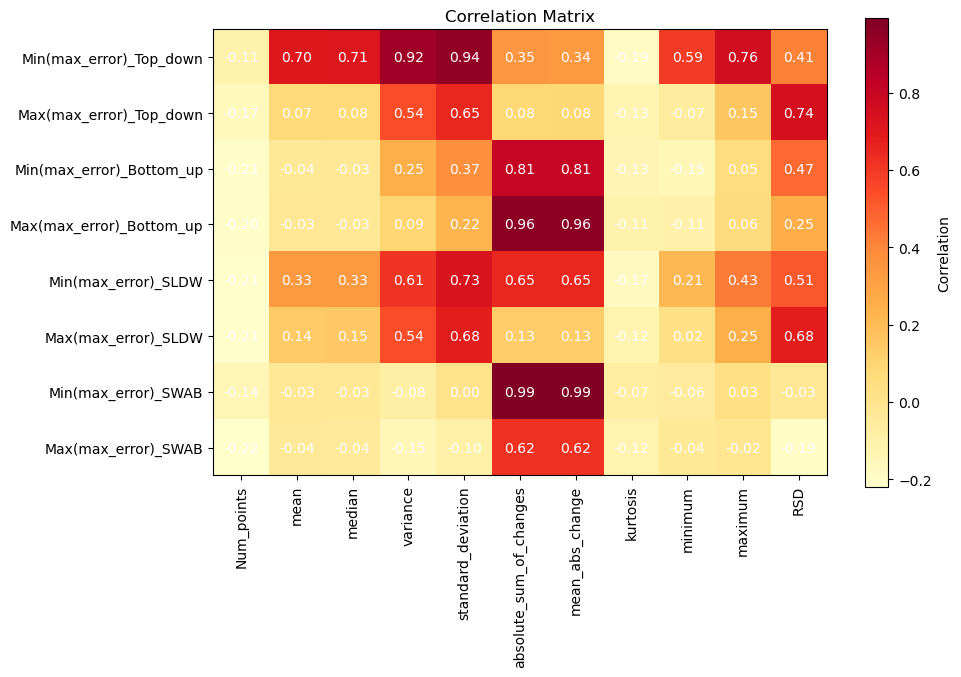

In [194]:
plt.figure(figsize=(10, 10))
plt.imshow(corr_feat_df, cmap='YlOrRd', interpolation='nearest')
plt.colorbar(label='Correlation',shrink=0.5)
plt.title('Correlation Matrix')

for i in range(len(corr_feat_df.index)):
    for j in range(len(corr_feat_df.columns)):
        plt.text(j, i, f'{corr_feat_df.iloc[i, j]:.2f}', ha='center', va='center', color='white')

plt.xticks(ticks=np.arange(len(corr_feat_df.columns)), labels=corr_feat_df.columns,rotation=90)
plt.yticks(ticks=np.arange(len(corr_feat_df.index)), labels=corr_feat_df.index)
plt.tight_layout()